# Data source information
Generate a DataFrame from this url -
https://www.kaggle.com/datasets/lovishbansal123/airbnb-data

# Introduction

The data set contains information about booking trends on Airbnb platform, online marketplace for short and long-term homestays. The company was founded in 2008. The data set consists of information for a period of 9 years between 2008 and 2017 for six cities in the United States: New York City, Washington, D.C., San Francisco, Los Angeles, Chicago, Boston. It includes information such as the property type, room type, number of bedrooms and bathrooms, information about hosts, zipcodes, number of reviews etc. In my analysis I will aim to answer following questions:
1. What are the most common property types?
2. What is the average bedrooms number?
3. What is the average guests number that could be accommodated in each booking?
4. Which room types are most popular?
5. Is instant booking option popular?
6. Is it a common practice to charge cleaning fees?
7. What is the relationship between cancellation policy and room type?
8. What is the relationship between the hosts' review scores and cancellation policies? 
9. Which city, out of the 6 analysed, offers the biggest amount of accommodations? 
10. What is the distribution of prices overall and in each city separately?
11. What are the most popular and most expensive neighbourhoods?
12. Is there any correlation between hosts' review scores rating, their number of reviews and the date they started hosting?
13. Are there any price range patterns?
14. What are the price patterns in each city?


# Reading Data in Dataframe



In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Airbnb_Data.csv')

# Exploratory Data Analysis

In [3]:
# Display the first 5 rows of dataframe
df.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

## Data Cleaning and Preprocessing

 - Check for missing values and handle them appropriately.
 - Check for any duplicate entries and remove them if necessary.
 - Convert data types if needed (e.g. host response rate, zipcode to numeric types).
 - Fill in missing values (e.g. host response rate, bedrooms, beds with the mean from other entries)

In [5]:
# missing values count
missing_values_count = df.isnull().sum()
print("Missing Values:")
print(missing_values_count)
print('---------------------------')

# check for duplicate entries
duplicate_entries = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicate_entries}")
print('---------------------------')

# number of total missing values
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = round((total_missing/total_cells) * 100, 2)
print(f'Percent of data that is missing: {percent_missing}%')

Missing Values:
id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64
---------------------------
Number of dupli

In [6]:
# Drop missing values in first_review, last_review, review_scores_rating, zipcode, neighbourhood columns
df = df.dropna(subset=['first_review', 'last_review', 'review_scores_rating', 'zipcode', 'neighbourhood'], axis=0)

# Fill Nan in column host_since with the same date as the date of the first review
for date in df.host_since:
    df.host_since = df.first_review 

# Fill Nan values with f (false) for columns host_has_profile_pic, host_identity_verified
df[['host_has_profile_pic', 'host_identity_verified']] = df[['host_has_profile_pic', 'host_identity_verified']].fillna('f')

# Fill Nan in bathroom column with a value = 1
df['bathrooms'] = df['bathrooms'].fillna(1)

# Fill thumbnail_url column to 'Unknown'
df['thumbnail_url'] = df['thumbnail_url'].fillna('Unknown')



In [7]:
# Convert zipcode column type 
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')

# Drop rows with missing values in zipcode column
df = df.dropna(subset =['zipcode'])
df['zipcode']= df.zipcode.astype('int64')

# Conver host_response_rate column type
df['host_response_rate'] = df['host_response_rate'].str.replace("%", "")
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors = 'coerce')

# Fill host_response_rate, bedrooms and beds columns with a mean of the column
host_mean = df['host_response_rate'].mean()
bedrooms_mean = df['bedrooms'].mean().round()
beds_mean = df['beds'].mean().round()

df['host_response_rate'] = df['host_response_rate'].fillna(host_mean)
df['bedrooms'] = df['bedrooms'].fillna(bedrooms_mean).astype('int64') # convert to int64 type
df['beds'] = df['beds'].fillna(beds_mean).astype('int64') # convert to int64 type

# Convert first_review, host_since, last_review columns to datetime 
cols = ['first_review', 'host_since' , 'last_review']
df[cols] = df[cols].apply(pd.to_datetime, errors = 'coerce')


In [8]:
# Display the first few rows of the cleaned DataFrame
display("Cleaned DataFrame:")
display(df.head(5))
display(df.info())

'Cleaned DataFrame:'

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1,1
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3,3
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1,3
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,Unknown,20009,0,1
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1,1


<class 'pandas.core.frame.DataFrame'>
Index: 51915 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      51915 non-null  int64         
 1   log_price               51915 non-null  float64       
 2   property_type           51915 non-null  object        
 3   room_type               51915 non-null  object        
 4   amenities               51915 non-null  object        
 5   accommodates            51915 non-null  int64         
 6   bathrooms               51915 non-null  float64       
 7   bed_type                51915 non-null  object        
 8   cancellation_policy     51915 non-null  object        
 9   cleaning_fee            51915 non-null  bool          
 10  city                    51915 non-null  object        
 11  description             51915 non-null  object        
 12  first_review            51915 non-null  datetime64[

None

## Summary Statistics
   - Calculate basic summary statistics such as mean, median, standard deviation, and range for numerical columns.
   - Explore the distribution of categorical variables such as property type, room type, cancellation_policy, etc.

In [9]:
# Divide columns into numerical and non numerical columns
columns = df.columns

numerical_columns = []
object_columns = []

for column in columns:
    if df[column].dtypes == 'int64' or df[column].dtypes == 'float64' or df[column].dtypes == 'datetime64[ns]':
        numerical_columns.append(column)
    else:
        object_columns.append(column)    

In [10]:
# Calculate basic summary statistics for numerical columns
numerical_columns_summary = df[numerical_columns].describe()
numerical_columns_summary

,id,log_price,accommodates,bathrooms,first_review,host_response_rate,host_since,last_review,latitude,longitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
count,5.191500e+04,51915.000000,51915.000000,51915.000000,51915,51915.000000,51915,51915,51915.000000,51915.000000,51915.000000,51915.000000,51915.000000,51915.000000,51915.000000
mean,1.124433e+07,4.767464,3.198825,1.220196,2015-12-27 21:25:28.413753088,95.573065,2015-12-27 21:25:28.413753088,2017-03-21 12:35:49.390349568,38.763965,-90.705391,27.596109,94.079418,41763.410421,1.257575,1.731137
min,9.410000e+02,0.000000,1.000000,0.000000,2008-11-17 00:00:00,0.000000,2008-11-17 00:00:00,2009-12-13 00:00:00,33.705835,-122.511500,1.000000,20.000000,2108.000000,0.000000,0.000000
25%,6.239028e+06,4.317488,2.000000,1.000000,2015-05-30 00:00:00,95.573065,2015-05-30 00:00:00,2017-01-20 00:00:00,34.199662,-118.329426,3.000000,92.000000,10036.000000,1.000000,1.000000
50%,1.220796e+07,4.744932,2.000000,1.000000,2016-05-09 00:00:00,100.000000,2016-05-09 00:00:00,2017-05-01 00:00:00,40.682049,-74.000651,11.000000,96.000000,11249.000000,1.000000,1.000000
75%,1.639424e+07,5.187386,4.000000,1.000000,2017-01-02 00:00:00,100.000000,2017-01-02 00:00:00,2017-09-12 00:00:00,40.756128,-73.951283,34.000000,100.000000,90046.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,2017-10-05 00:00:00,100.000000,2017-10-05 00:00:00,2017-10-05 00:00:00,42.390437,-71.000261,542.000000,100.000000,94158.000000,10.000000,18.000000
std,6.080801e+06,0.662544,2.112132,0.554831,NaN,12.038429,NaN,NaN,2.966998,21.430833,41.844392,7.705405,38238.134969,0.838591,1.251906


In [11]:
# Explore the distribution of categorical variables
category = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'neighbourhood']

for column in category:
    print(df[column].value_counts())
    print('--------------------------')

property_type
Apartment             35052
House                 11020
Condominium            1780
Townhouse              1142
Loft                    928
Other                   388
Guesthouse              360
Bed & Breakfast         319
Bungalow                262
Dorm                    100
Guest suite              98
Villa                    82
In-law                   62
Hostel                   49
Cabin                    49
Boutique hotel           47
Boat                     38
Camper/RV                38
Timeshare                33
Serviced apartment       14
Castle                   12
Tent                      9
Vacation home             6
Treehouse                 5
Chalet                    5
Hut                       4
Yurt                      4
Earth House               3
Tipi                      3
Cave                      2
Train                     1
Name: count, dtype: int64
--------------------------
room_type
Entire home/apt    30114
Private room       20612
Share

# Data visualization

Create visualizations to understand the distribution of property types, room types, bedrooms, number of guests possible to accommodate, instant booking options, cleaning fee charges, prices of accommodations, reviews scores, cities and neighbourhoods in various relationships, including histograms, pie chart, box plots, violin plots.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('darkgrid')

## Visialization 1. Distribution of property types (top 12) 

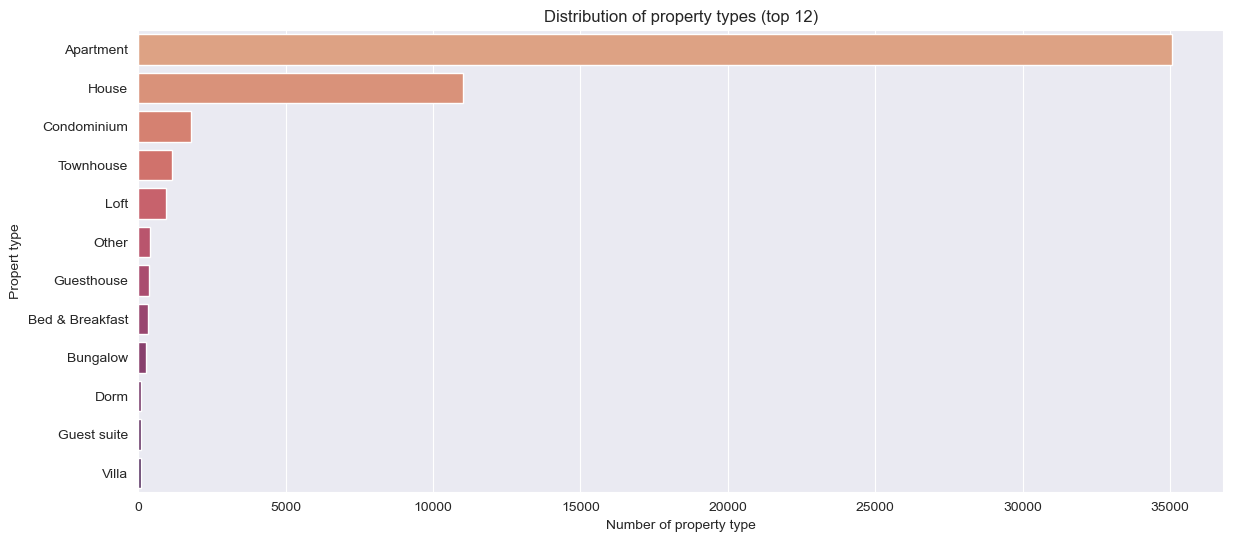

In [13]:
# Distribution of property types - popular top 12
property_type_distribution = df['property_type'].value_counts().reset_index()

# Bar plot of property types
plt.figure(figsize=(14, 6))
sns.barplot(x = 'count', y='property_type', 
            data = property_type_distribution[:12], palette="flare")
plt.title('Distribution of property types (top 12)')
plt.ylabel('Propert type')
plt.xlabel('Number of property type')
plt.show()

The bar plot reveals that apartments are the most popular type of accommodation on Airbnb platform followed by houses. Other types of accommodation play a small part in the above distribution.

## Visualization 2. Distribution of bedrooms and guests possible to accomodate

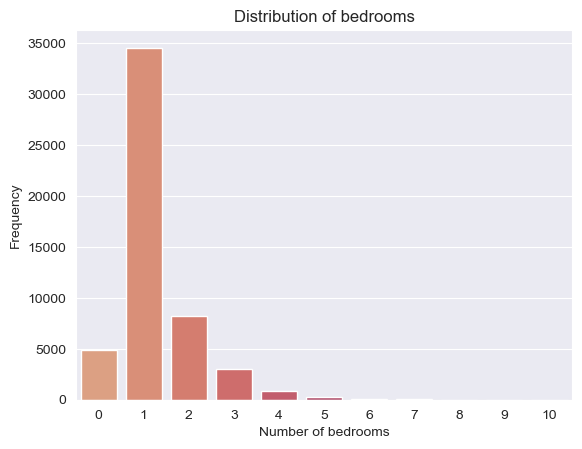

In [14]:
# Count plot of distribution of bedrooms
sns.countplot(data=df, x='bedrooms', palette="flare")
plt.title('Distribution of bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Frequency')
plt.show()

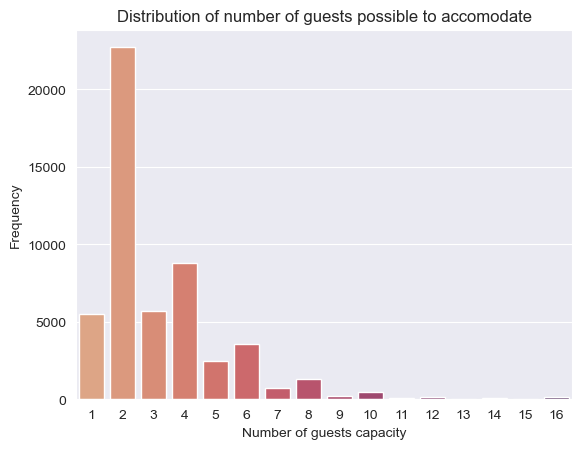

In [15]:
# Count plot of distribution of number of guests possible to accomodate
sns.countplot(data=df, x='accommodates', palette="flare")
plt.title('Distribution of number of guests possible to accomodate')
plt.xlabel('Number of guests capacity')
plt.ylabel('Frequency')
plt.show()

The count plot shows that the locations offering one bedroom are the most popular ones. The meaning of 0 bedrooms might mean that the rented accommodation is being a studio.
Also, accommodations able to host two guests are the most popular ones. There are not many places which would be available for groups consisting of 7 and more people.


## VIsualization 3. Distributions of room types

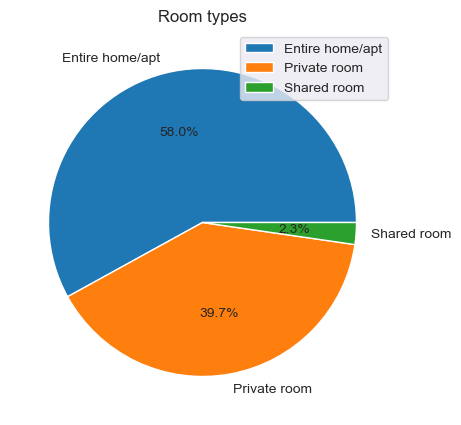

In [16]:
# Distribution of room types
types_room= df['room_type'].value_counts()

# Pie chart of distribution of room types
plt.figure(figsize=(5, 5))
plt.pie(types_room, labels=types_room.index, autopct='%1.1f%%')
plt.title('Room types')
plt.legend(loc='upper right')
plt.show()

The pie chart visualizes the proportion between room types. Even though the entire home/apartments are the most popular ones (58%), the option to rent a private room is also popular and takes almost 40% of all room types.

## Visualization 4. Instant booking option


In [17]:
# Convert instant_bookable column values to True and False 
df['instant_bookable'] = ['True' if booking_type=='t' else 'False' for booking_type in df['instant_bookable'] ]

C:\Users\jolam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

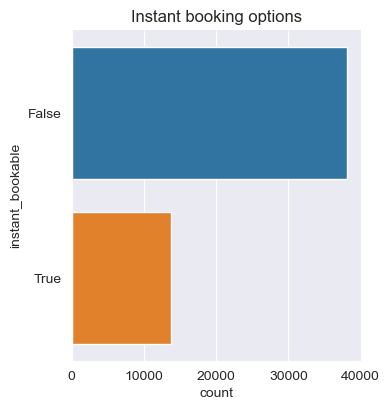

In [18]:
#Plot the count plot 
plt.figure(figsize=(5, 5))
sns.catplot(data=df, y='instant_bookable', kind='count', height = 4)
plt.title('Instant booking options')
plt.show()

In [19]:
# Calculate percentage of True and False
total = len(df['instant_bookable'])
only_true = df['instant_bookable'].value_counts()[1]
only_false = df['instant_bookable'].value_counts()[0]
true_perc = round(only_true/total *100)
false_perc = round(only_false/total *100)

print(f'Instant booking impossible ("False"): {false_perc}%')
print(f'Instant booking possible ("True"): {true_perc}%')

Instant booking impossible ("False"): 73%
Instant booking possible ("True"): 27%


Only 27% of hosts decides to offer instant booking option. The other 73% of hosts decide to unable it. 

## Visualization 5. Cleaning fee charges

C:\Users\jolam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

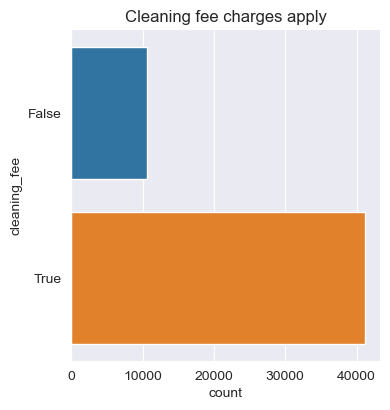

In [54]:
#Plot the count plot 
plt.figure(figsize=(5, 5))
sns.catplot(data=df, y='cleaning_fee', kind='count', height = 4)
plt.title('Cleaning fee charges apply')
plt.show()

In [21]:
# Calculate percentage of True and False
total = len(df['cleaning_fee'])
only_true = df['cleaning_fee'].value_counts()[0]
only_false = df['cleaning_fee'].value_counts()[1]
true_perc = round(only_true/total *100)
false_perc = round(only_false/total *100)

print(f"Cleaning fees don't apply (False): {false_perc}%")
print(f'Cleaning fees apply (True): {true_perc}%')

Cleaning fees don't apply (False): 21%
Cleaning fees apply (True): 79%


Almost 80% of hosts set addition cleaning fee for each booking made. Only 21% of hosts decide not to charge additionally for the cleaning.

## Visualization 6. Cancellation policy vs Room type

C:\Users\jolam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


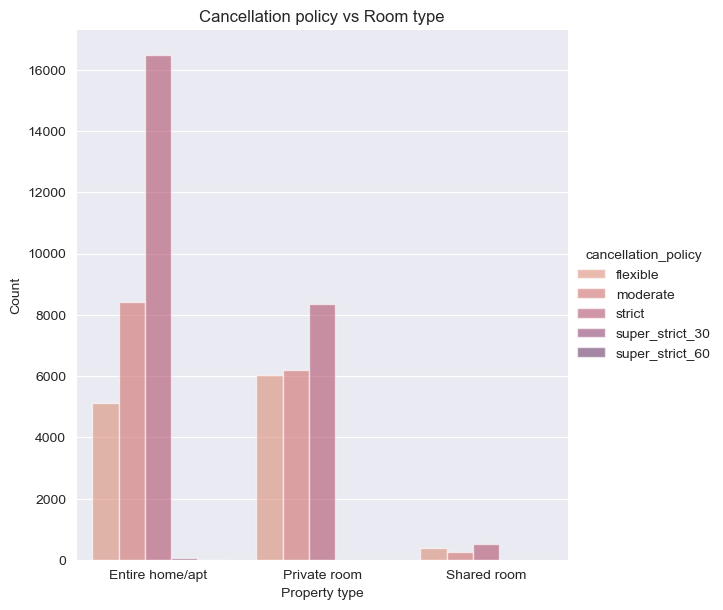

In [51]:
# Extract smaller data set for plotting
type_policy = df.groupby('room_type')['cancellation_policy'].value_counts().reset_index()

# Plot the barplot showing the relationship between cancellation policy vs room type
sns.catplot(
    data = type_policy, kind = 'bar',
    x='room_type', y= 'count', hue='cancellation_policy', 
    hue_order=['flexible', 'moderate', 'strict', 'super_strict_30','super_strict_60'],
    palette="flare", alpha=.6, height=6)
plt.title('Cancellation policy vs Room type')
plt.ylabel('Count')
plt.xlabel('Property type')
plt.show()

The bar chart displays cancellation policy within each room type. In both, entire home and private room, the strict policy type is significantly the most popular one. In private room, both moderate and flexible cancellation policy types appear almost equally. In shared room, cancellation policy types varies but there are not many differences in number.
Super strict polices are marginal.


## Visualization 7. Review score vs Room type

C:\Users\jolam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

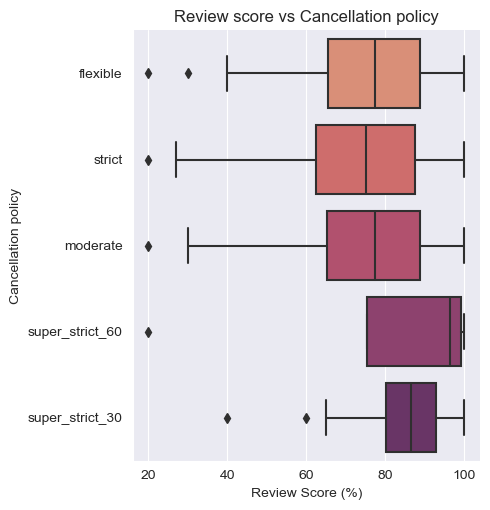

In [52]:
# Extract smaller data set for plotting
respond_policy = df.groupby('review_scores_rating')['cancellation_policy'].value_counts().reset_index()

# Box plot showing the relationship between review score and cancellation policy
plt.figure(figsize=(20, 20))
sns.catplot(
    data = respond_policy, kind = 'box', orient="h",
    y='cancellation_policy', x= 'review_scores_rating', palette="flare",
    hue_order=['flexible', 'moderate', 'strict', 'super_strict_30','super_strict_60'])
plt.title('Review score vs Cancellation policy')
plt.xlabel('Review Score (%)')
plt.ylabel('Cancellation policy')
plt.show()

Hosts with the highest review scores tend to set super strict cancellation policy. The boxes for flexible, strict and moderate cancellation policy are very similar. The whiskers for strict and moderate cancellation policy are slightly longer toward lower review score. 

## Visualization 8. Distribution of cities

C:\Users\jolam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

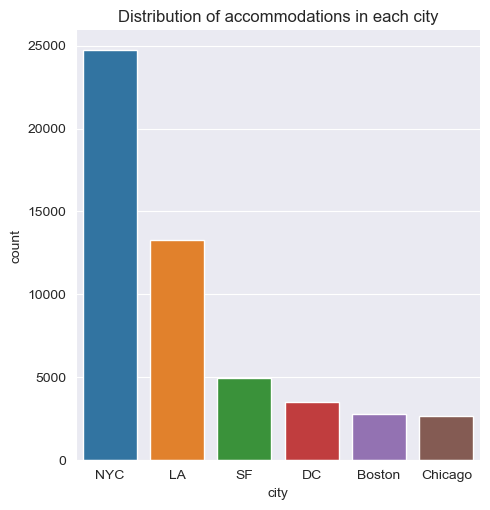

In [37]:
# Plot the bar chart with cities
plt.figure(figsize=(6,6))
sns.catplot(data = df, x='city', kind='count',
           order = df['city'].value_counts().index)
plt.title('Distribution of accommodations in each city')
plt.show()

New York City offers the biggest number of accommodation, followed by Los Angeles, San Francisco, Washington D.C. Boston and Chicago has the fewest accommodation to offer.

## Visualization 9. Distribution of prices

C:\Users\jolam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x400 with 0 Axes>

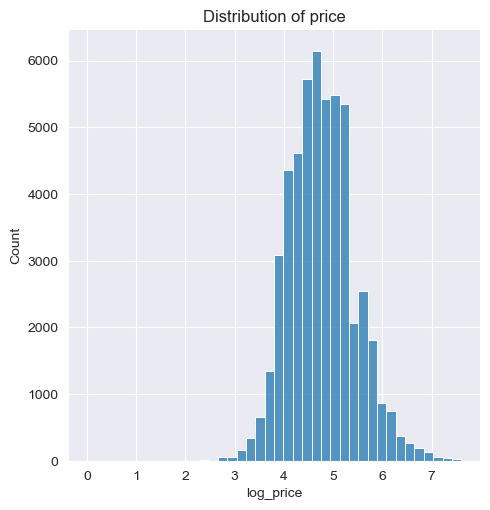

In [48]:
# Plot the histogram
plt.figure(figsize=(10,4))
sns.displot(df.log_price, bins=40)
plt.title('Distribution of price')
plt.show()

In this data set the exact meaning of the column log_price wasn't clarified. Nevertheless, the consistent values give an overview of price distribution and could be used for further analysis. 


## Visualization 10. Distribution and density of prices vs Cities

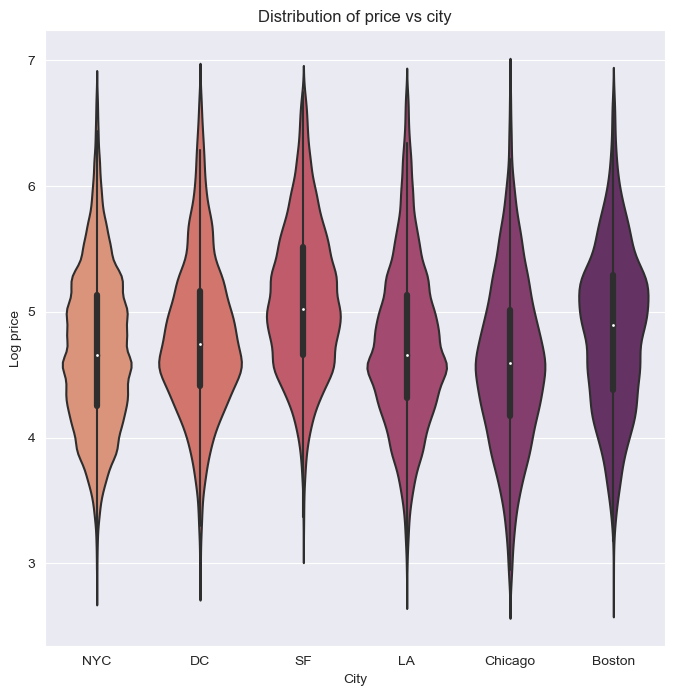

In [26]:
from scipy import stats # for statistics calculations

# Detect and exclude outliers
price_city = df[np.abs(stats.zscore(df['log_price'])) < 3]

# Plot the violin plot
plt.figure(figsize=(8,8))
sns.violinplot(
    x='city', 
    y='log_price', 
    data= price_city,
palette="flare");

plt.title('Distribution of price vs city')
plt.xlabel('City')
plt.ylabel('Log price')
plt.show()

The violin plots show the distribution of prices and their density in each city. The highest median of prices occurs in San Francisco, while the lowest one in Chicago. Los Angeles and Chicago tend to have similar price distribution. Violin plot representing New York City is almost equally distributed within interquartile range out of all six plots. Boston tends to have more accommodations within higher price range.

## Visualization 11. Neighbourhoods vs bookings

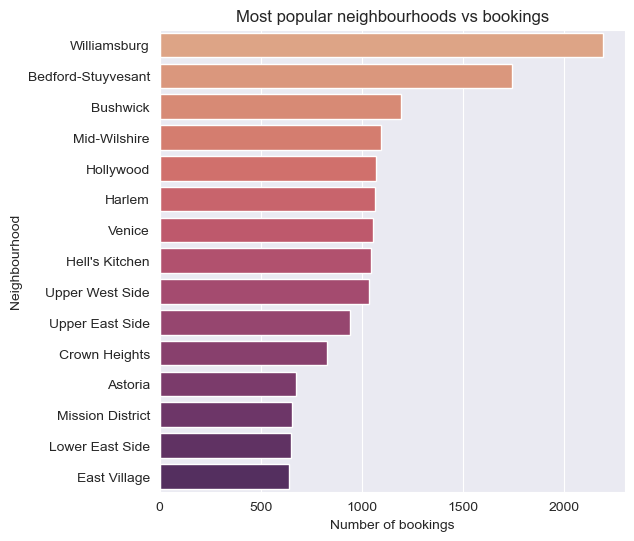

In [27]:
# Extract smaller data set for plotting
popular_neighbourhood= df['neighbourhood'].value_counts()[:15].sort_values(ascending=False).reset_index()

# Plot the horizontal bar plot
plt.figure(figsize=(6,6))
sns.barplot(x='count', y='neighbourhood', data=popular_neighbourhood, palette="flare")

plt.title('Most popular neighbourhoods vs bookings')
plt.xlabel('Number of bookings')
plt.ylabel('Neighbourhood')
plt.show()

The horizontal bar plot shows 15 most popular neighbourhoods. Three first areas (Williamsburg, Bedford-Stuyvesant, Bushwick) are located in New York City which are significantly the most popular within all. The following two (Mid-Wilshire, Hollywood) are located in Los Angeles.

## Visualization 12. Most expensive neighbourhoods

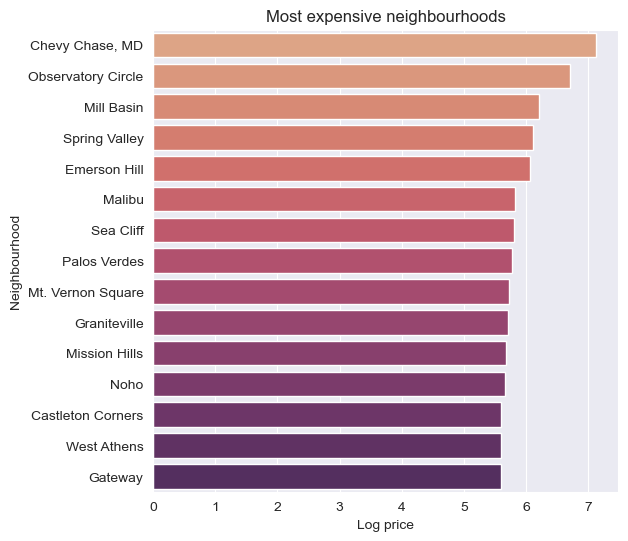

In [38]:
# Extract smaller data set for plotting
price_neighbourhood = df[['log_price', 'neighbourhood']]
price_neighbourhood = price_neighbourhood.groupby(by='neighbourhood')['log_price'].mean().reset_index().sort_values(by='log_price', ascending=False)[:15]

# Plot the horizontal bar plot
plt.figure(figsize=(6,6))
sns.barplot(data=price_neighbourhood, x = 'log_price', y='neighbourhood', palette="flare")                         
plt.title('Most expensive neighbourhoods')
plt.xlabel('Log price')
plt.ylabel('Neighbourhood')
plt.show()                       

The horizontal bar plot shows 15 most expensive neighbourhoods. Two first areas (Chevy Chase, MD, Observatory Circle) are located in Washington D.C. The following three (Mill Basin, Spring Valley, Emerson Hill) are located in New York City.

# Correlation Analysis

Explore correlations between variables such as host since, review scores rating, number of reviews to understand any relationships between these factors.

## Correlation matrix

In [29]:
# Calculate correlation matrix for host_since, review_scores_rating, number_of_reviews
correlation_matrix = df[['host_since', 'review_scores_rating', 'number_of_reviews']].corr()

# Display the correlation matrix
correlation_matrix

,host_since,review_scores_rating,number_of_reviews
host_since,1.000000,0.031704,-0.465473
review_scores_rating,0.031704,1.000000,0.010754
number_of_reviews,-0.465473,0.010754,1.000000


## Heat Map
To better visualize these correlations, here is a heatmap, which provides a color-coded representation of the correlation matrix:

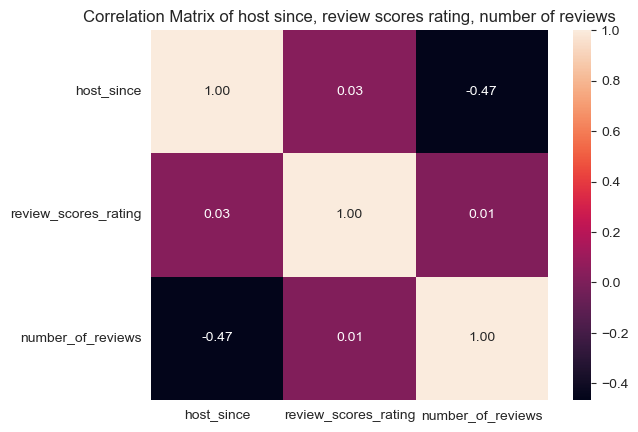

In [39]:
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Matrix of host since, review scores rating, number of reviews')
plt.show()


This heatmap visually shows the strength and direction of the relationships between host since, review scores rating, number of reviews.  I am specifically interested in seeing if there is a correlation between host since and the other two variables, reviews scores rating and number of reviews.  There does not appear to be a strong correlation.

# Exploring Price Patterns

Explore price patterns such as the frequency of the price range.

In [31]:
# Adjust the data set for analysis by the price into more categories
# Define a function to categorize the price

def cetegorize_price(price):
    if price < df['log_price'].quantile(0.2):
        return 'Cheap'
    elif price < df['log_price'].quantile(0.4):
        return 'Afordable'
    elif price < df['log_price'].quantile(0.7):
        return 'Standard'
    elif price < df['log_price'].quantile(0.9):
        return 'Expensive'
    else:
        return 'Premium'

## Visualization 2.1 of price patterns exploration

In [32]:
# Apply the categorization function to the 'log_price' column
df['price_category'] = df['log_price'].apply(cetegorize_price)

<Figure size 1400x800 with 0 Axes>

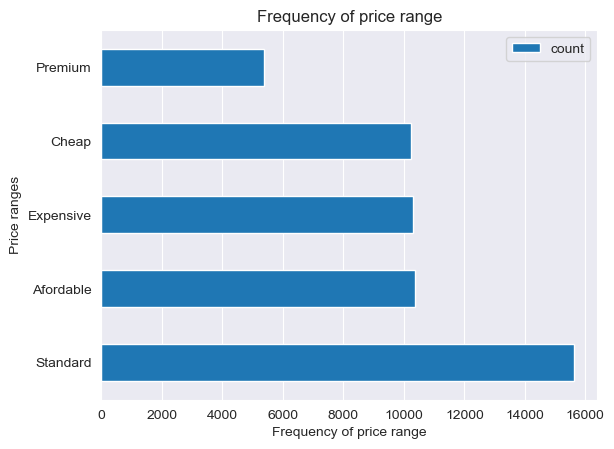

In [41]:
# Count the number of entries per categorized price
categorized_prices = df['price_category'].value_counts().reset_index()

# Plot the horizontar bar chart 
plt.figure(figsize=(14, 8))
categorized_prices.plot(kind='barh', x='price_category')
plt.title('Frequency of price range')
plt.xlabel('Frequency of price range')
plt.ylabel('Price ranges')
plt.grid(axis='y')
plt.show()

Interestingly, number of cheap accommodations occurs similarly to expensive and affordable ones. As expected, there is not as much premium places as standards.

## Visualization 2.2 of price patterns exploration


C:\Users\jolam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


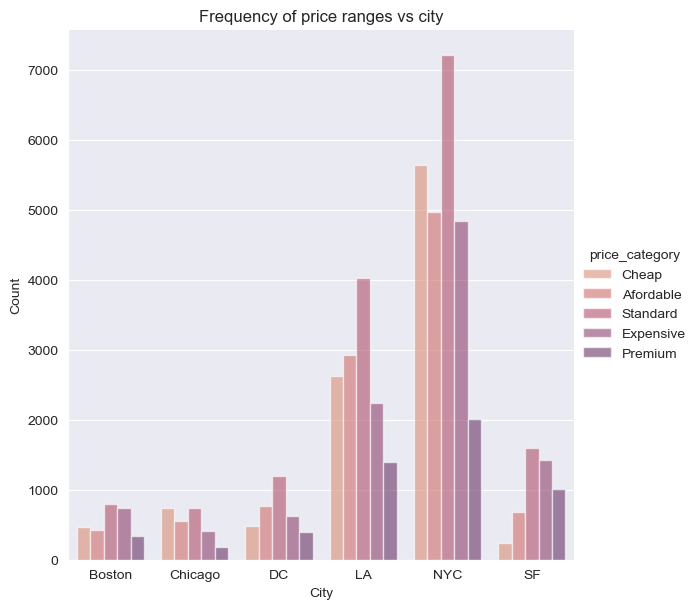

In [47]:
# Group and extract smaller data set for plotting
category_price_in_city = df.groupby(by='city')['price_category'].value_counts().reset_index()

# Plot bar chart for each city
sns.catplot(
    data = category_price_in_city, kind = 'bar',
    x='city', y= 'count', hue='price_category', palette="flare", 
    alpha=.6, height=6, hue_order=['Cheap', 'Afordable', 'Standard','Expensive', 'Premium'])
plt.title('Frequency of price ranges vs city')
plt.ylabel('Count')
plt.xlabel('City')
plt.show()


In each city the standard price accommodations are in majority. New Your City offers vast range of accommodations' number and price category ranges. In San Francisco there is a little portion of cheap accommodations and majority of expensive and premiums. Chicago offers similar number of cheap and standard accommodations.


# Summary 

Analysing this data set I was able to answer most of my questions. The data manipulation and visualizations reveal that:
- The most popular property type offered on Airbnb platform is significantly apartment, then followed by houses and condominiums.
- Usually, accommodations with one bedroom and able to accommodate 2 guests are the most common. Families or bigger groups might find difficulties in booking one place for everyone. 
- Entire home/apartment availability is 58%, followed by private room (40%), and marginal shared room (2%).
- Instant booking is not so popular option. Only 27% of hosts allow it.
- Almos 80% of hosts charge additional cleaning fee.
- Hosts prefers to choose strict cancellation policy over the moderate and flexible types. 
- Hosts with the highest review scores tend to set super strict cancellation policy. Flexible, strict and moderate cancellation policy occurs comparably and refer to similar host review score.
- New York City offers the biggest number of accommodations. Next one, Los Angeles, provides half of the NYC number. San Francisco, Washington D.C., Boston and Chicago offer less than 5000 accommodation each which equals 1/5 of what NYC has to offer. 
- The highest median of prices occurs in San Francisco, while the lowest one in Chicago. Los Angeles and Chicago tend to have similar price distribution. Prices in New York City are almost equally distributed within interquartile range out of all six plots. Boston tends to have more accommodations within higher price range.
- The neighbourhoods with biggest number of accommodations are Williamsburg, Bedford-Stuyvesant, Bushwick which are all located in New York City. The following two, Mid-Wilshire and Hollywood, are in Los Angeles.
- The most expensive neighbourhoods are Chevy Chase, MD, Observatory Circle which are located in Washington D.C. The following three, Mill Basin, Spring Valley and Emerson Hill, are in New York City.
- There are no correlations between start date of hosting, host review score rating and number of reviews. 
- After manipulating data, the prices were divided into 5 categories: cheap, affordable, standard, expensive, premium. It allowed to view the price patterns in each city. The standard range peaks in every city. New Your City offers vast range of accommodations' number and price category ranges. In San Francisco there is a little portion of cheap accommodations but majority of them are expensive and premium ones. Chicago offers similar number of cheap and standard accommodations. 
- Interestingly, overall number of cheap accommodations occurs at the same level as expensive or affordable ones. As expected, in total there is not as much premium places as standards.
